No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


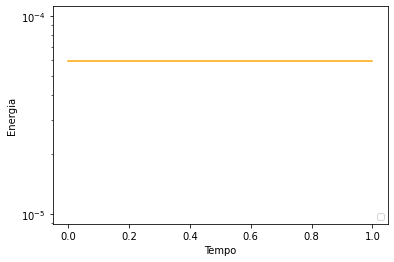

In [1]:
import icecream
import decimal
from math import *
from matplotlib.pyplot import plot, show, legend, xlim, ylim, xlabel, ylabel
import matplotlib.pyplot as plt
#GMm/d^2 = mac = mw^2d
#GM/d^2 = s*pi/T
G = 4.0 * pi**2
m = 10
n = 1
r = 1000

#Primeiro vamos fazer por Verlet

#condicao inicial
x = 1 ; vx = 0
y = 0 ; vy = 2 * pi


def a(x, y):
    d = sqrt(x**2 + y**2)
    acel = -G / d**3
    return acel

def energia(v):
    e = ((5.9722e24/1.989e30) * v**2)/2 - G*(5.9722e24/1.989e30) / r
    return e

v = sqrt(vx**2 + vy**2)
s = sqrt(x**2 + y**2)
tf = 1
dt = 0.001
dt2 = dt * dt
nt = int(tf / dt)


T = [] ; X = [] ; Y = [] ; VX = [] ; VY = [] ; E = []
T.append(0) ; X.append(x)  ; Y.append(y) ;VX.append(vx) ; VY.append(vy) ; E.append(energia(v))

xold = x
x = x + vx * dt

yold = y
y = y + vy * dt

sold = s
s = s + v *dt

for i in range(1, nt + 1):
    t = i * dt
    acel = a(x, y)  #aceleracao funcao de x e y

    xnew = 2 * x - xold + acel * x * dt2
    vx = (xnew - xold) / (2 * dt)


    ynew = 2 * y - yold + acel * y * dt2
    vy = (ynew - yold) / (2 * dt)

    e = energia(v)

    T.append(t)
    X.append(x)
    Y.append(y)
    VX.append(vx)
    VY.append(vy)
    E.append(energia(v))


    xold = x
    x = xnew

    yold = y
    y = ynew


xlabel("Tempo")
ylabel("Energia")
plot(T, E, color="orange")
#plot(W, T, label="Velocidade em y", color="blue")
legend(loc="lower right", fontsize="small")
plt.yscale('log')

In [ ]:
from cProfile import label
import icecream
import decimal
from math import *
from matplotlib.pyplot import plot, show, legend, xlim, ylim, xlabel, ylabel
import matplotlib.pyplot as plt

#RUNGEKUTTA4
G = 4.0 * pi**2
m = 5.9722e24/1.989e30
n = 1
r = 1000


#condicao inicial
x = 1 ; vx = 0
y = 0 ; vy = 2 * pi


def a(x, y):
    d = sqrt(x**2 + y**2)
    acel = -G / d**3
    return acel

def energia(v):
    e = ((m) * v**2)/2 - G*(m) / r
    return e

def posx(x):
    return(x)

def posy(y):
    return(y)

v = sqrt(vx**2 + vy**2)
s = sqrt(x**2 + y**2)
tf = 1
dt = 0.001
dt2 = dt * dt
nt = int(tf / dt) + 1


T = [] ; X = [] ; Y = [] ; VX = [] ; VY = [] ; E = []
T.append(0) ; X.append(x)  ; Y.append(y) ;VX.append(vx) ; VY.append(vy) ; E.append(energia(v,s))


for i in range(1,nt):
    t = i*dt
    x1=x
    y1=y

    x2  =  x + vx*dt/2     # RK4 - 1a parte
    y2  =  y + vy*dt/2     # RK4 - 1a parte
    ac1 = a(x,y)
    vx2 = vx + ac1*x*dt/2   # aceleracao gravitacional na direcao x
    vy2 = vy + ac1*y*dt/2   # aceleracao gravitacional na direcao y
    
    x3  =  x + vx2*dt/2      # RK4 - 2a parte 
    y3  =  y + vy2*dt/2      # RK4 - 2a parte
    ac2 = a(x2,y2)
    vx3 = vx + ac2*x2*dt/2   # aceleracao gravitacional na direcao x
    vy3 = vy + ac2*y2*dt/2   # aceleracao gravitacional na direcao y

    x4 = x + vx3*dt          # RK4 - 3a parte  
    y4 = y + vy3*dt          # RK4 - 3a parte  
    ac3 = a(x3,y3)
    vx4 = vx+ac3*x3*dt       # aceleracao gravitacional na direcao x
    vy4 = vy+ac3*y3*dt       # aceleracao gravitacional na direcao y

    ac4 = a(x4,y4)

    x = x + (vx + 2*vx2 + 2*vx3 + vx4)*dt/6
    y = y + (vy + 2*vy2 + 2*vy3 + vy4)*dt/6

    vx = vx + (x1*ac1 + x2*2*ac2 + x3*2*ac3 + x4*ac4)*dt/6
    vy = vy + (y1*ac1 + y2*2*ac2 + y3*2*ac3 + y4*ac4)*dt/6

    v = sqrt((vx**2) + (vy**2))
    s = sqrt((x**2) + (y**2))

    e = energia(v)

    T.append(t); X.append(x); Y.append(y) ; VX.append(vx) ; VY.append(vy) ;E.append(e)
  

#xlabel("Tempo")
#ylabel("Energia")
plot(T,E, color="pink")
#plot(T, VY, color='purple', label='Velocidade em Y')
legend(loc="lower right", fontsize="small")
show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


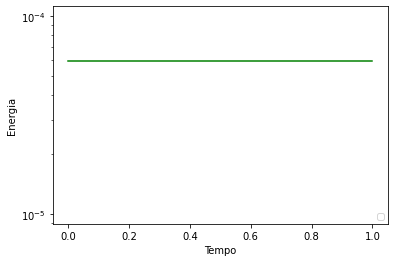

In [73]:
from cProfile import label
import icecream
import decimal
from math import *
from matplotlib.pyplot import plot, show, legend, xlim, ylim, xlabel, ylabel
import matplotlib.pyplot as plt

#RUNGEKUTTA4
G = 4.0 * pi**2
m = 5.9722e24/1.989e30
n = 1
r = 1000


#condicao inicial
x = 1 ; vx = 0
y = 0 ; vy = 2 * pi


def a(x, y):
    d = sqrt(x**2 + y**2)
    acel = -G / d**3
    return acel

def energia(v):
    e = ((m) * v**2)/2 - G*(m) / r
    return e

def posx(x):
    return(x)

def posy(y):
    return(y)

v = sqrt(vx**2 + vy**2)
s = sqrt(x**2 + y**2)
tf = 1
dt = 0.001
dt2 = dt * dt
nt = int(tf / dt) + 1


T = [] ; X = [] ; Y = [] ; VX = [] ; VY = [] ; E = []
T.append(0) ; X.append(x)  ; Y.append(y) ;VX.append(vx) ; VY.append(vy) ; E.append(energia(v))


for i in range(1,nt):
    t = i*dt
    x1=x
    y1=y

    x2  =  x + vx*dt/2     # RK4 - 1a parte
    y2  =  y + vy*dt/2     # RK4 - 1a parte
    ac1 = a(x,y)
    vx2 = vx + ac1*x*dt/2   # aceleracao gravitacional na direcao x
    vy2 = vy + ac1*y*dt/2   # aceleracao gravitacional na direcao y
    
    x3  =  x + vx2*dt/2      # RK4 - 2a parte 
    y3  =  y + vy2*dt/2      # RK4 - 2a parte
    ac2 = a(x2,y2)
    vx3 = vx + ac2*x2*dt/2   # aceleracao gravitacional na direcao x
    vy3 = vy + ac2*y2*dt/2   # aceleracao gravitacional na direcao y

    x4 = x + vx3*dt          # RK4 - 3a parte  
    y4 = y + vy3*dt          # RK4 - 3a parte  
    ac3 = a(x3,y3)
    vx4 = vx+ac3*x3*dt       # aceleracao gravitacional na direcao x
    vy4 = vy+ac3*y3*dt       # aceleracao gravitacional na direcao y

    ac4 = a(x4,y4)

    x = x + (vx + 2*vx2 + 2*vx3 + vx4)*dt/6
    y = y + (vy + 2*vy2 + 2*vy3 + vy4)*dt/6

    vx = vx + (x1*ac1 + x2*2*ac2 + x3*2*ac3 + x4*ac4)*dt/6
    vy = vy + (y1*ac1 + y2*2*ac2 + y3*2*ac3 + y4*ac4)*dt/6

    e = energia(v)

    T.append(t); X.append(x); Y.append(y) ; VX.append(vx) ; VY.append(vy) ;E.append(energia(v))
  

xlabel("Tempo")
ylabel("Energia")
plot(T,E, color="green")
#plot(T, VY, color='purple', label='Velocidade em Y')
legend(loc="lower right", fontsize="small")
plt.yscale('log')
show()

In [43]:
erro = sqrt for i in range(1,nt):
    

-42.05052051588675